I have made 4 notebook on this dataset to show Statistics and Machine Learning. You can read all of them here ==>

1. [Univariate Statistical Analysis](https://www.kaggle.com/ravichaubey1506/univariate-statistical-analysis-on-diabetes)
2. [Multivariate Staistical Analysis](https://www.kaggle.com/ravichaubey1506/multivariate-statistical-analysis-on-diabetes)
3. [Inferencial Statistics](https://www.kaggle.com/ravichaubey1506/inferential-statistics-on-diabetes)
4. [Predective Modelling on Diabtes](https://www.kaggle.com/ravichaubey1506/predictive-modelling-knn-ann-xgboost/)

In [192]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_style('darkgrid')

In [193]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Introduction

Let us  do some EDA to see behaviour of data which will help in Preprocessing.

In [194]:
print("Shape of Data is ==> ",df.shape)

Shape of Data is ==>  (768, 9)


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [196]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Summary

Data is related to healthcare Industry having 768 observations with 9 variable. Target variable is Outcome. It looks like there is no missing value, and boolean, float , integers are different datatypes available. Well descriptive analysis shows that variable Glucose, BoodPressure,SckinThickness, Insulin and BMI have minimum value 0 which does not make any sense, these values are either missing or outliers, But i am not going to alter them so that i can see actual statistics of Data. I can see in Pregnancies column, minimum is 0 (May be this is sign for no pregnancy) which is considerable, But maximum month of pregnancy is 17 which does not make any sense. Variance among different predictor variable is varying at large scale , Scaling data will be helpful for Predective modelling.

# Data Cleaning

**Let us check column names first and manipulate if any change needed.**

In [197]:
for i in df.columns:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


**I will change DiabtesPedigreeFunction to DPF for conviniene**

In [198]:
df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Let us check datatypes of variables**

In [199]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

**Everything is perfect.**

# Preprocessing

You might get confuse what is difference between Data Cleaning and Data Preprocessing?

Well Data Preprocessing is beyong Data Cleaning is used to Make data tidy. Data Preprocessing is used to make data in way such that we can fit model to it.

## Missing Values & Outliers

Let us look to missing values and handle them. 
First I create function to handle outliers.Standard deviation based detection.

In [200]:
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

In [201]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

**<font color='red'> It looks like there is no missing values. But in descriptive statistics we have seen that some variables have minimum = 0 and pregnancy variable has maximum = 17 which is not making sense. So let us explore these variables and treat them accordingly.</font>**

**Please note that in my last 3 notebooks we have seen that variables are following normal distribution , So with Statistical Evidence we can fill values using Mean, Median and Mode.**

Other Notebook in this series are ==>

1. [Univariate Statistical Analysis](https://www.kaggle.com/ravichaubey1506/univariate-statistical-analysis-on-diabetes)
2. [Multivariate Staistical Analysis](https://www.kaggle.com/ravichaubey1506/multivariate-statistical-analysis-on-diabetes)
3. [Inferencial Statistics](https://www.kaggle.com/ravichaubey1506/inferential-statistics-on-diabetes)

In [202]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

We can see that minimum is 0 which may be considered as no Pregnancy, But maximum is 17 which is not making sense. Let us see distribution and also boxplot for outliers

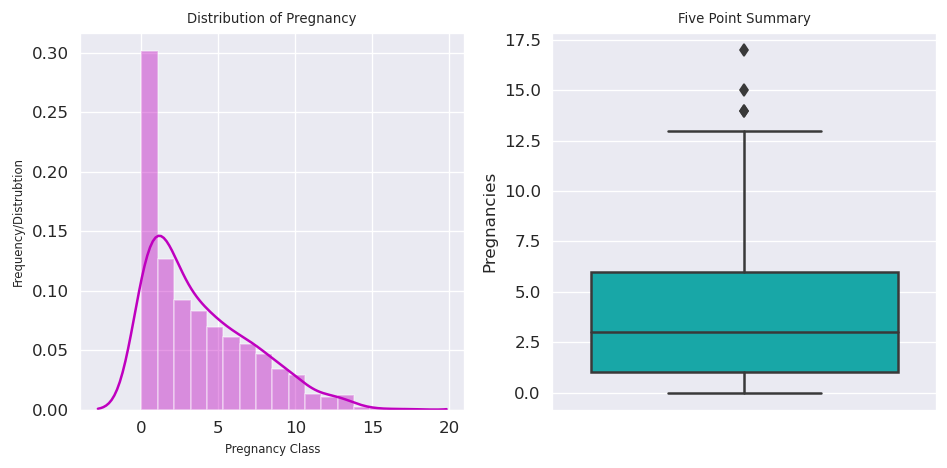

In [203]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='m')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

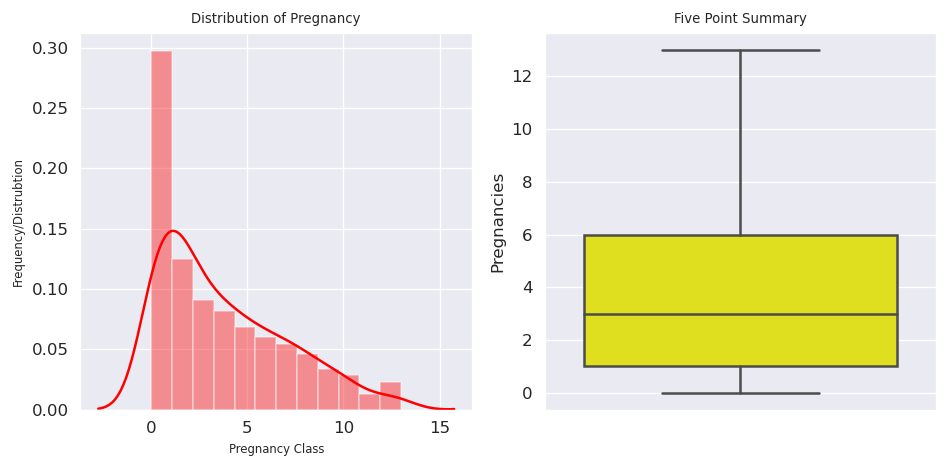

In [204]:
#Treating Outlier and then verifying it

df = std_based('Pregnancies',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='red')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=df,ax=axes[1],orient = 'v',color='yellow')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

*<font color = 'blue'> Well, we are done with Pregnancy variable. Let us see next one. </font>*

In [205]:
df['Glucose'].describe()

count    764.000000
mean     120.776178
std       31.946234
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

<font color = 'blue'> Glucose = 0, does not make any sense. </font>

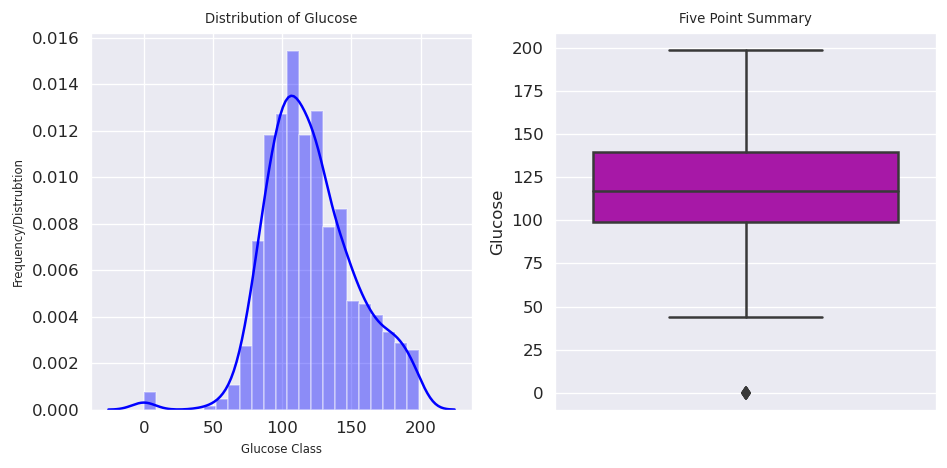

In [206]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

<font color = 'blue'> There is no outlier and also distribution is normal , So i will treat 0 with mean value.</font>

In [207]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


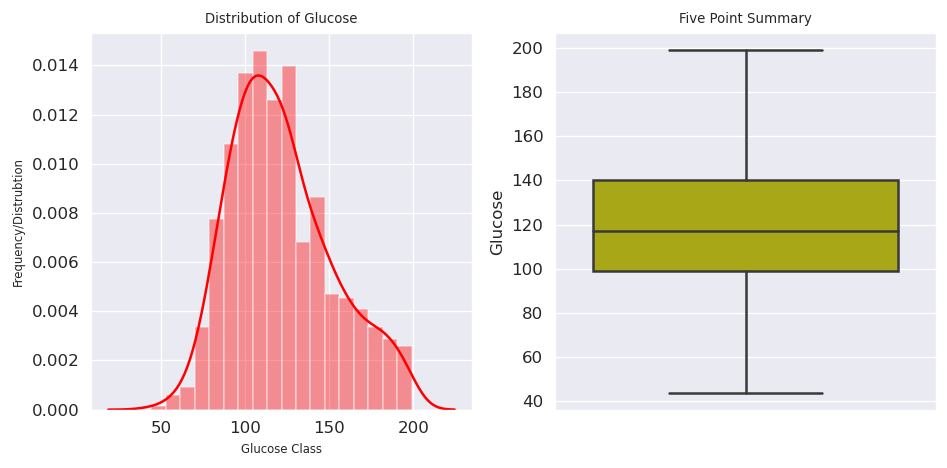

In [208]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='y')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

<font color = 'blue'> Well, done with Glucose also,Let us see next. </font>

In [209]:
df.BloodPressure.describe()

count    764.000000
mean      69.098168
std       19.401789
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

**We need to look at BP=0**

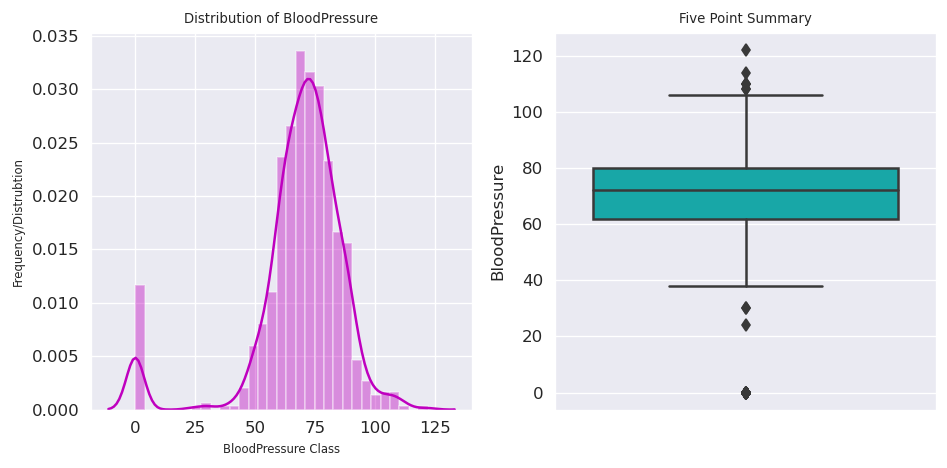

In [210]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

It looks like there are few Outliers at both higher end and lower end. But at higher end maximum BP is 122, So it is considerable. Now at lower end BP near 25 is not making sense. So i will treat missing value with medium and then i will also treat outliers.

In [211]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [212]:
df  = std_based('BloodPressure',df)

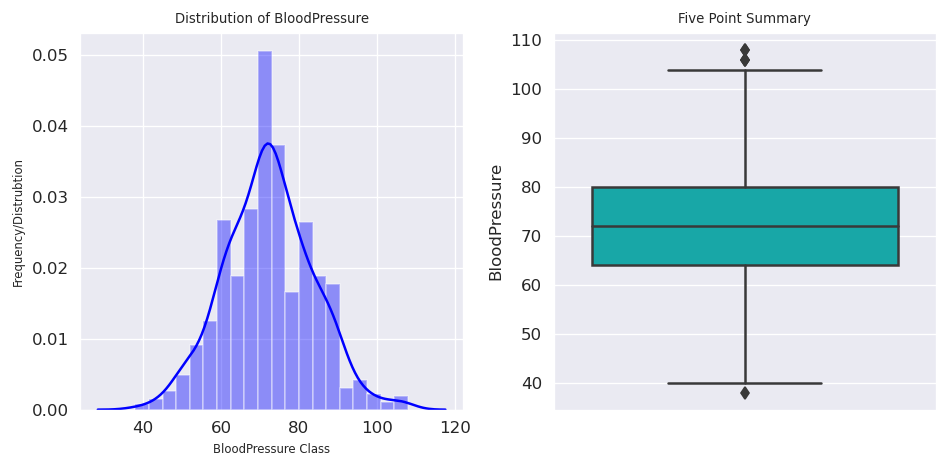

In [213]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Well , Let us see next one.

In [214]:
df.SkinThickness.describe()

count    756.000000
mean      20.428571
std       15.952377
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

Let us look at 0 SkinThickness.

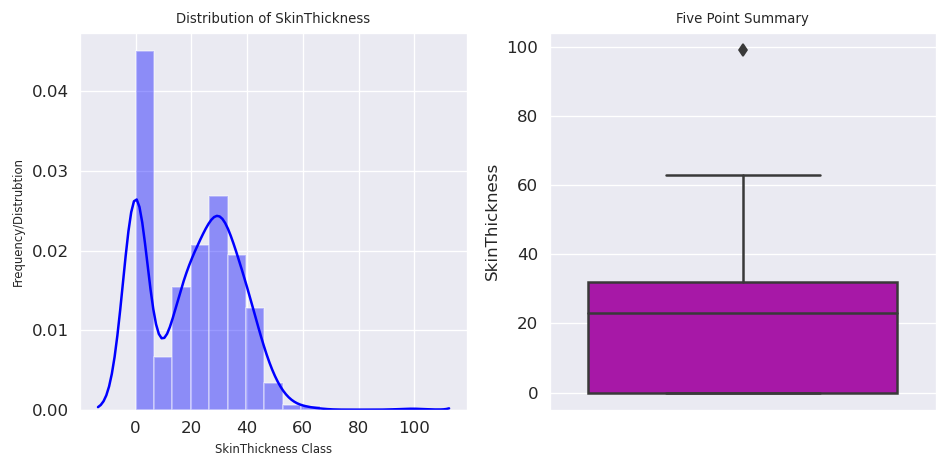

In [217]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='b')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [218]:
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,0,33.6,0.627,50,1
1,1,85.0,66,29.000000,0,26.6,0.351,31,0
2,8,183.0,64,20.428571,0,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [219]:
df = std_based("SkinThickness",df)

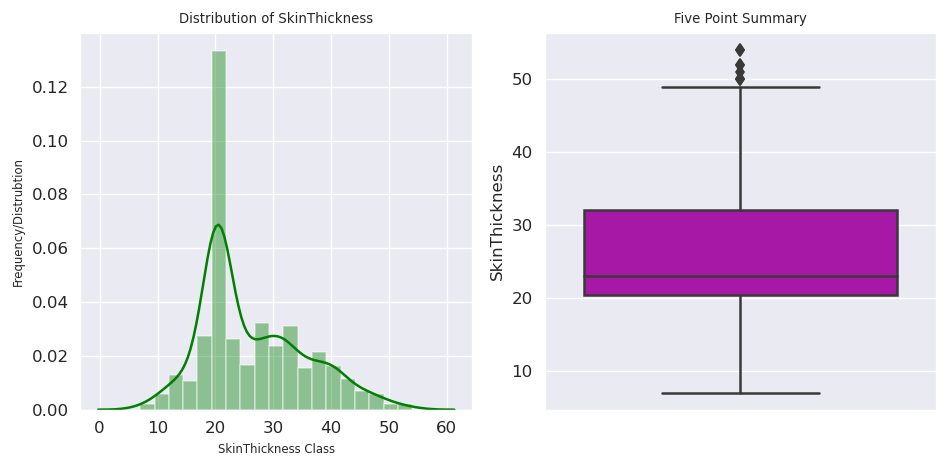

In [221]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='green')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**Can you see , I am using plot twice one before treating and another after treatment. Look at changes :), Let us see next variable.**

In [222]:
df.Insulin.describe()

count    752.000000
mean      79.889628
std      115.995453
min        0.000000
25%        0.000000
50%       26.000000
75%      128.250000
max      846.000000
Name: Insulin, dtype: float64

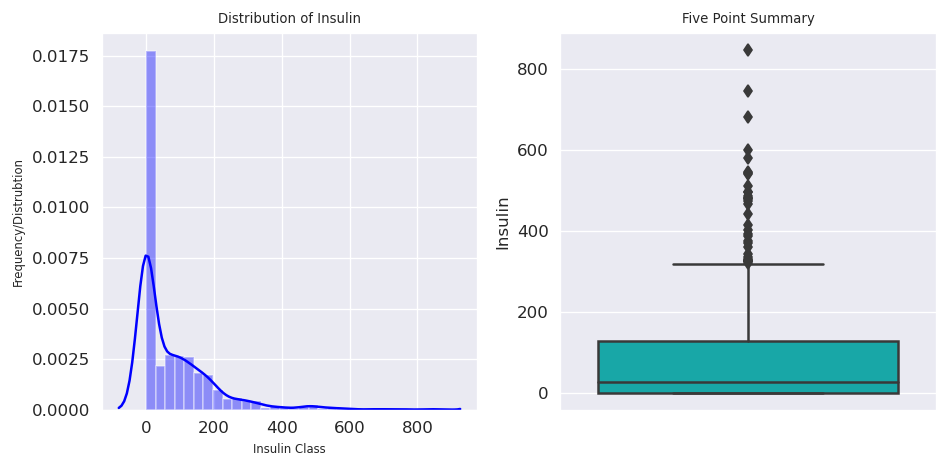

In [226]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**We can see there are many outliers. So i will fill 0 with Median of Insulin. I will also treat Outliers after removing zero.**

In [227]:
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [228]:
df = std_based('Insulin',df)

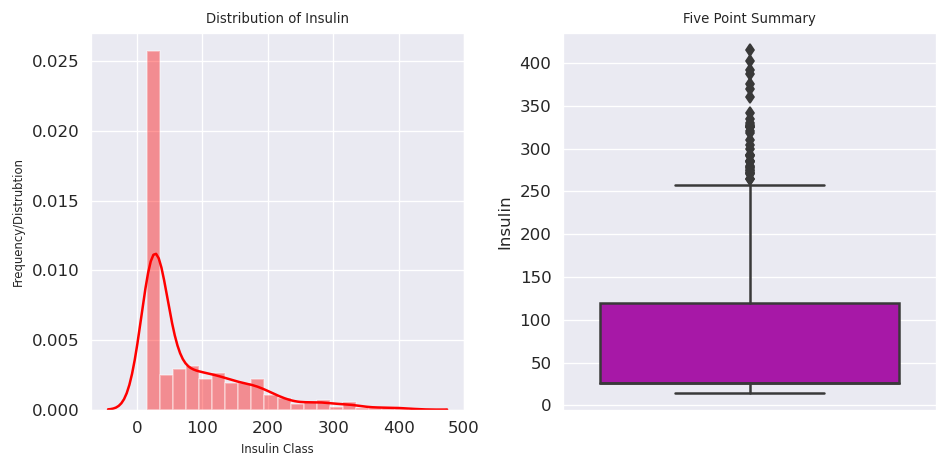

In [231]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**Please observe the scale at Y axis to see if outliers has been treated to some extent :) **

In [232]:
df.BMI.describe()

count    734.000000
mean      31.649728
std        7.630830
min        0.000000
25%       27.025000
50%       32.000000
75%       36.100000
max       57.300000
Name: BMI, dtype: float64

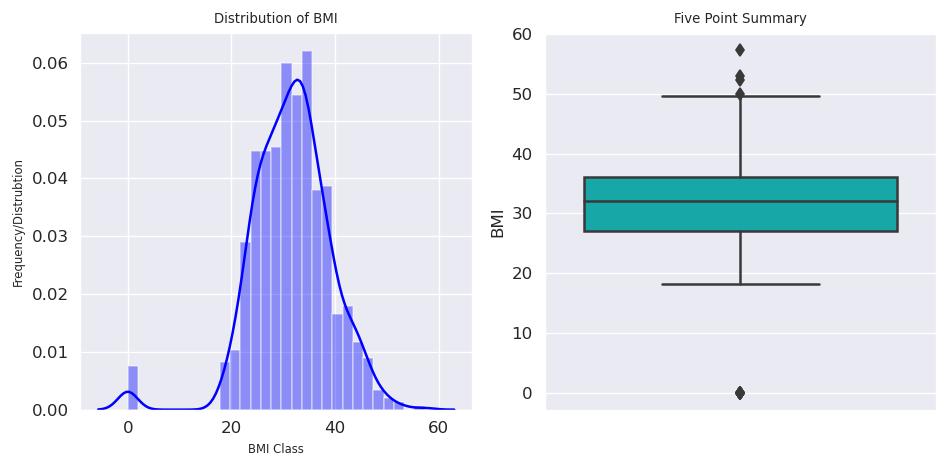

In [233]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

** Outliers are considerable, So i will replace zero with mean. **

In [234]:
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


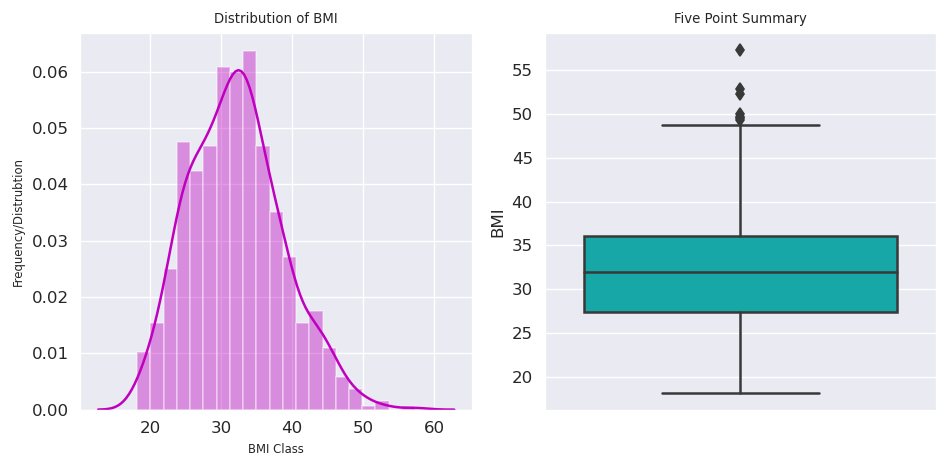

In [235]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [37]:
df.DPF.describe()

count    734.000000
mean       0.464274
std        0.313676
min        0.078000
25%        0.244000
50%        0.367000
75%        0.612750
max        2.288000
Name: DPF, dtype: float64

Well things is fine here, Let us see for Outliers.

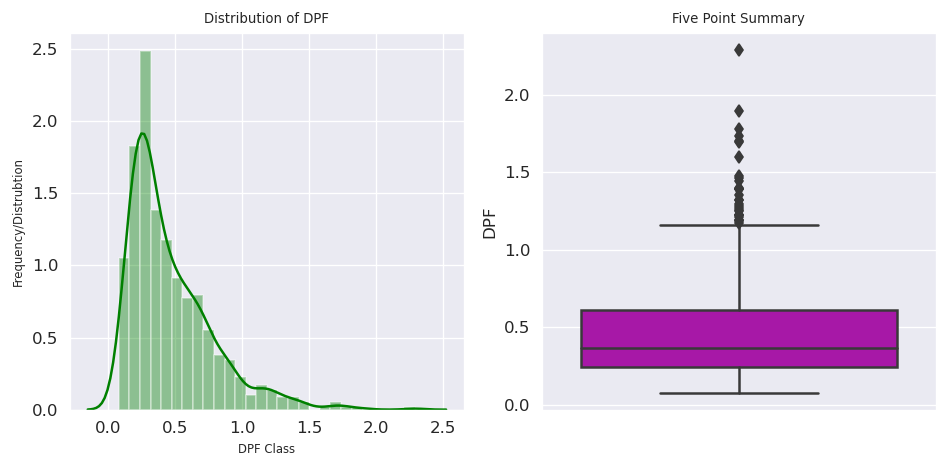

In [239]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DPF'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DPF',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Outliers are present at higher end. Let us treat them.

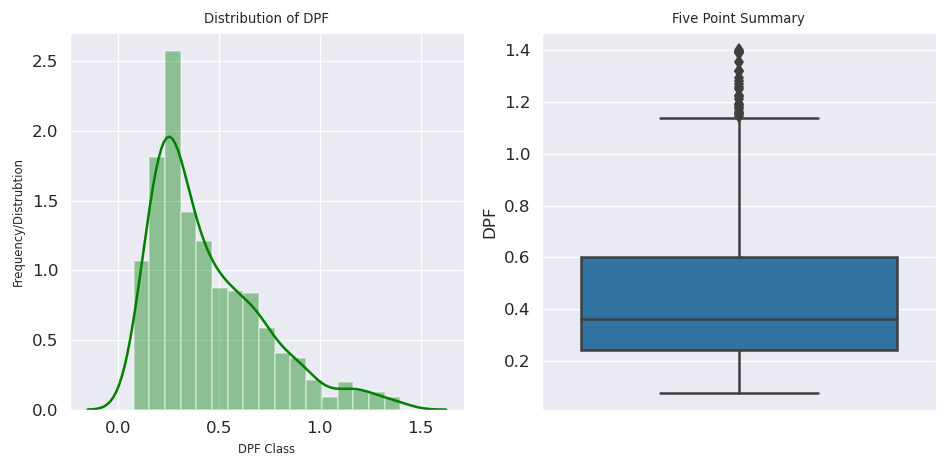

In [39]:
df = std_based('DPF',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DPF'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DPF',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [40]:
df.Age.describe()

count    724.000000
mean      33.111878
std       11.711371
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

Let us take a look for outliers.

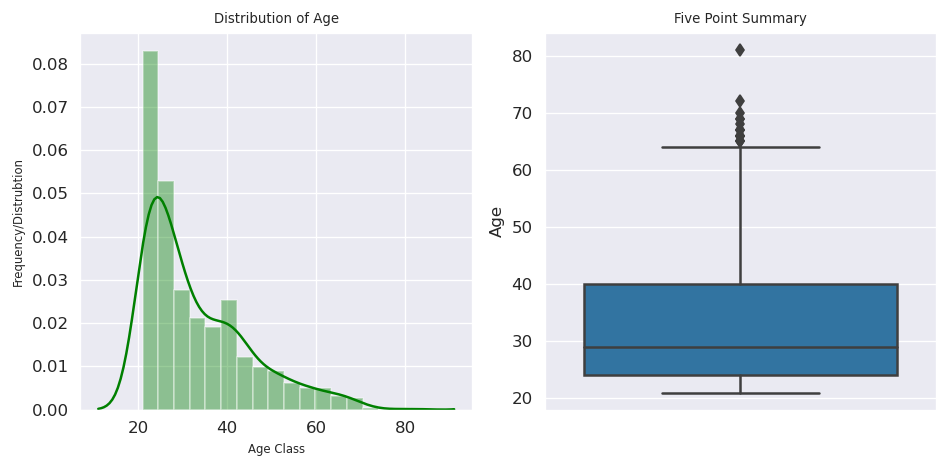

In [41]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

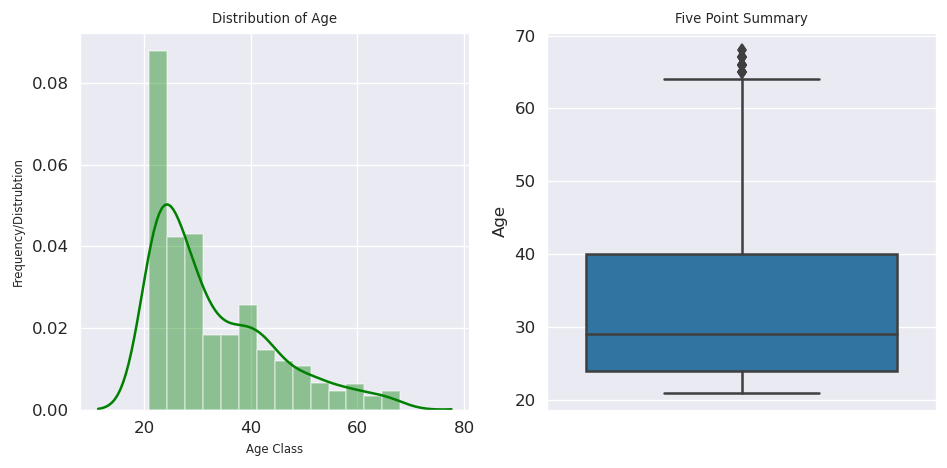

In [42]:
df = std_based('Age',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**<font color = 'red'> Now we are done with missing value and Outliers. Let us take a look at data and then move ahead with other steps.**

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
5,5,116.0,74,20.428571,26,25.6,0.201,30,0


In [44]:
df.shape

(719, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      719 non-null int64
Glucose          719 non-null float64
BloodPressure    719 non-null int64
SkinThickness    719 non-null float64
Insulin          719 non-null int64
BMI              719 non-null float64
DPF              719 non-null float64
Age              719 non-null int64
Outcome          719 non-null int64
dtypes: float64(4), int64(5)
memory usage: 56.2 KB


**Everything is fine. Let us move to next step. There is no categorical variable, So we need not to worry about encoding. **

## Statistical Assumption

Let us check for some assumption like variance. Distribution is absolutely fine. We have already seen in other notebooks.

In [46]:
df.var()

Pregnancies        10.704623
Glucose           872.795253
BloodPressure     128.731754
SkinThickness      80.891303
Insulin          6387.167685
BMI                42.768611
DPF                 0.077433
Age               127.254326
Outcome             0.223604
dtype: float64

**<font color = 'red'> Variance is varying to a greater extent, So i will standardize.</font>** I am removing dpf because variance is very low.

In [47]:
df.drop('DPF',axis = 1,inplace=True)

## Spliting Data

In [48]:
df.Outcome.value_counts()

0    477
1    242
Name: Outcome, dtype: int64

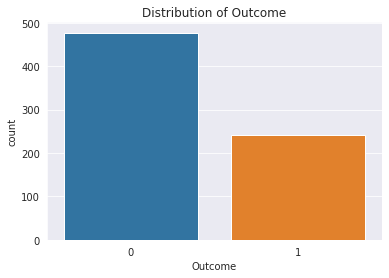

In [49]:
sns.countplot(df['Outcome']).set_title('Distribution of Outcome')
plt.show()

We can see that Outcome is balance so we need not to **Stratify** data.

In [50]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(575, 7)
(144, 7)
(575,)
(144,)


In [51]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

# KNN

I will not use linear classifier, Please see my 2nd notebook to find why i am not using?

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors':[5,10,15,25,30,50]}

grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)

In [58]:
grid_knn.fit(x_train_std,y_train)
print("Best Score ==> ", grid_knn.best_score_)
print("Tuned Paramerers ==> ",grid_knn.best_params_)
print("Accuracy on Train set ==> ", grid_knn.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_knn.score(x_test_std,y_test))

Best Score ==>  0.7615849969751965
Tuned Paramerers ==>  {'n_neighbors': 15}
Accuracy on Train set ==>  0.7913043478260869
Accuracy on Test set ==>  0.7777777777777778


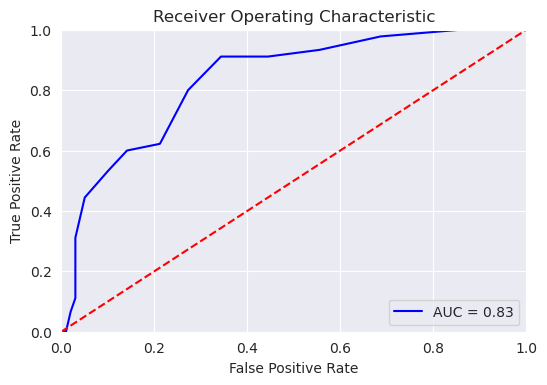

In [61]:
probs = grid_knn.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_leaf':[0.2,0.4,0.6,0.8,0.9,1]}

grid_dtc = GridSearchCV(dtc,param_grid,scoring='accuracy',cv = 10,refit = True)

In [89]:
grid_dtc.fit(x_train_std,y_train)
print("Best Score ==> ", grid_dtc.best_score_)
print("Tuned Paramerers ==> ",grid_dtc.best_params_)
print("Accuracy on Train set ==> ", grid_dtc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_dtc.score(x_test_std,y_test))

Best Score ==>  0.7355111917725348
Tuned Paramerers ==>  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}
Accuracy on Train set ==>  0.7860869565217391
Accuracy on Test set ==>  0.75


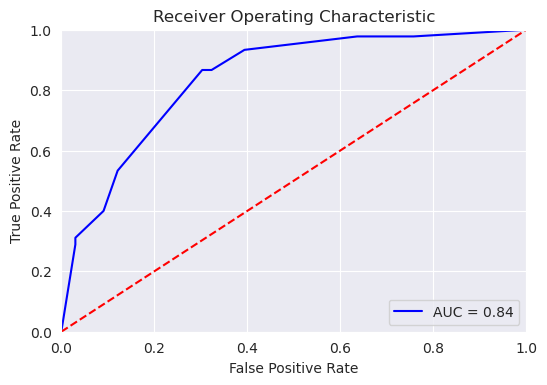

In [90]:
probs = grid_dtc.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVC

In [107]:
from sklearn.svm import SVC

svc = SVC(probability=True)

param_grid = {'kernel':['rbf','linear'],'C':[0.01,0.1,1,0.001],'gamma':[0.1,0.01,0.2,0.4]}

grid_svc = GridSearchCV(svc,param_grid,scoring='accuracy',cv = 10,refit = True)

In [108]:
grid_svc.fit(x_train_std,y_train)
print("Best Score ==> ", grid_svc.best_score_)
print("Tuned Paramerers ==> ",grid_svc.best_params_)
print("Accuracy on Train set ==> ", grid_svc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_svc.score(x_test_std,y_test))

Best Score ==>  0.7705384150030248
Tuned Paramerers ==>  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy on Train set ==>  0.782608695652174
Accuracy on Test set ==>  0.7847222222222222


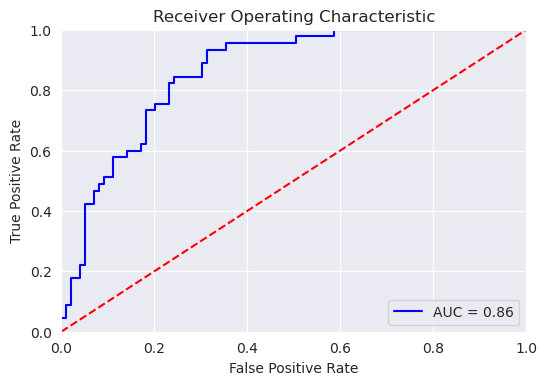

In [109]:
probs = grid_svc.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**We can see SVC is doing better than KNN and Decision Tree. Let us combine these models and see if we can improve accuracy.**

# Voting Classifier

In [110]:
from sklearn.ensemble import VotingClassifier

classifiers = [('knn',grid_knn),('tree',grid_dtc),('svc',grid_svc)]

vtc = VotingClassifier(classifiers)

In [111]:
vtc.fit(x_train_std,y_train)
print("Accuracy on Test set ==> ", vtc.score(x_test_std,y_test))

Accuracy on Test set ==>  0.7777777777777778


**SVC is doing good till now. Let us see if Random Forest, XGBoost and ANN can help to achieve more accuracy.**

# Feature Selection

Let us first use RFE to select important features.

In [119]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

for i in range(2,7):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(x_train_std,y_train)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(y_test, rfe.predict(x_test_std)))

Accuracy with Feature 2 ==> 0.7083333333333334
Accuracy with Feature 3 ==> 0.75
Accuracy with Feature 4 ==> 0.7986111111111112
Accuracy with Feature 5 ==> 0.8055555555555556
Accuracy with Feature 6 ==> 0.7777777777777778


In [120]:
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=5, verbose=0)
rfe.fit(x_train_std,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [135]:
print("Important Features are ==> ",list(df.columns[:7][rfe.support_]))

Important Features are ==>  ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']


**Sometime keeping unwanted variable increase variance in model. Let us see if we can improve accuracy by removing them.**

In [136]:
x=df.loc[:,list(df.columns[:7][rfe.support_])].values
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

(575, 5)
(144, 5)
(575,)
(144,)


# Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_grid = {'n_estimators':[200,500,1000],
              'max_depth':[2,3,4,5],
              'min_samples_leaf':[0.2,0.4,0.6,0.8,1],
              'max_features':['auto','sqrt'],
              'criterion':['gini','entropy']}

grid_rfc = RandomizedSearchCV(rfc,param_grid,n_iter=20,scoring='accuracy',cv = 10,refit = True)

In [140]:
grid_rfc.fit(x_train_std,y_train)
print("Best Score ==> ", grid_rfc.best_score_)
print("Tuned Paramerers ==> ",grid_rfc.best_params_)
print("Accuracy on Train set ==> ", grid_rfc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_rfc.score(x_test_std,y_test))

Best Score ==>  0.7531155474894132
Tuned Paramerers ==>  {'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'entropy'}
Accuracy on Train set ==>  0.7878260869565218
Accuracy on Test set ==>  0.7777777777777778


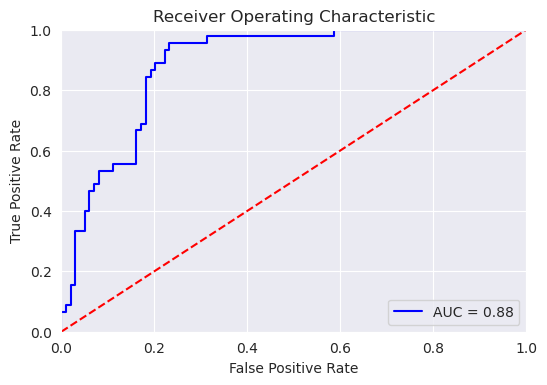

In [141]:
probs = grid_rfc.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost Classifier

In [144]:
import xgboost as xgb

xgbcl = xgb.XGBClassifier()

param_grid = {'booster':['gbtree','gblinear'],
             'colsample_bytree':[0.4,0.6,0.8,1],
             'learning_rate':[0.01,0.1,0.2,0.4],
             'max_depth':[2,3,4,6],
             'n_estimators':[200,300,400,500],
              'subsample':[0.4,0.6,0.8,1]}

grid_xgb = RandomizedSearchCV(xgbcl,param_grid,n_iter=30,scoring='accuracy',cv = 10,refit = True)

In [145]:
grid_xgb.fit(x_train_std,y_train)
print("Best Score ==> ", grid_xgb.best_score_)
print("Tuned Paramerers ==> ",grid_xgb.best_params_)
print("Accuracy on Train set ==> ", grid_xgb.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_xgb.score(x_test_std,y_test))

Best Score ==>  0.7704174228675136
Tuned Paramerers ==>  {'subsample': 0.6, 'n_estimators': 400, 'max_depth': 2, 'learning_rate': 0.01, 'colsample_bytree': 0.8, 'booster': 'gbtree'}
Accuracy on Train set ==>  0.8034782608695652
Accuracy on Test set ==>  0.7777777777777778


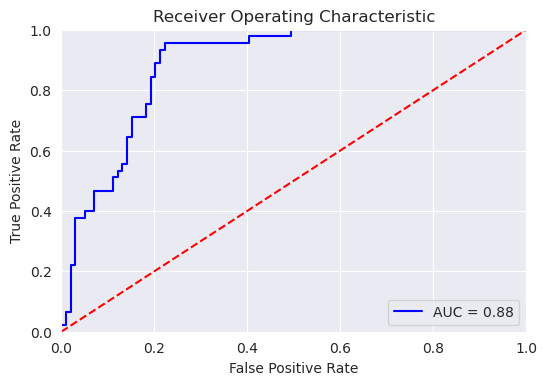

In [146]:
probs = grid_xgb.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ANN

In [164]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(x_train_std, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
575/575 [==============================] - 0s 334us/step - loss: 0.6890 - accuracy: 0.6539
Epoch 2/100
575/575 [==============================] - 0s 116us/step - loss: 0.6717 - accuracy: 0.6574
Epoch 3/100
575/575 [==============================] - 0s 105us/step - loss: 0.6274 - accuracy: 0.6574
Epoch 4/100
575/575 [==============================] - 0s 110us/step - loss: 0.5725 - accuracy: 0.6574
Epoch 5/100
575/575 [==============================] - 0s 115us/step - loss: 0.5429 - accuracy: 0.6574
Epoch 6/100
575/575 [==============================] - 0s 118us/step - loss: 0.5314 - accuracy: 0.6574
Epoch 7/100
575/575 [==============================] - 0s 116us/step - loss: 0.5248 - accuracy: 0.6574
Epoch 8/100
575/575 [==============================] - 0s 114us/step - loss: 0.5204 - accuracy: 0.6574
Epoch 9/100
575/575 [==============================] - 0s 108us/step - loss: 0.5171 - accuracy: 0.6574
Epoch 10/100
575/575 [==============================] - 0s 113us/step - l

575/575 [==============================] - 0s 112us/step - loss: 0.4674 - accuracy: 0.7670
Epoch 80/100
575/575 [==============================] - 0s 113us/step - loss: 0.4675 - accuracy: 0.7687
Epoch 81/100
575/575 [==============================] - 0s 118us/step - loss: 0.4667 - accuracy: 0.7652
Epoch 82/100
575/575 [==============================] - 0s 121us/step - loss: 0.4663 - accuracy: 0.7670
Epoch 83/100
575/575 [==============================] - 0s 118us/step - loss: 0.4663 - accuracy: 0.7635
Epoch 84/100
575/575 [==============================] - 0s 118us/step - loss: 0.4657 - accuracy: 0.7687
Epoch 85/100
575/575 [==============================] - 0s 121us/step - loss: 0.4654 - accuracy: 0.7687
Epoch 86/100
575/575 [==============================] - 0s 120us/step - loss: 0.4651 - accuracy: 0.7670
Epoch 87/100
575/575 [==============================] - 0s 125us/step - loss: 0.4649 - accuracy: 0.7670
Epoch 88/100
575/575 [==============================] - 0s 114us/step - loss:

In [165]:
y_pred_test = classifier.predict(x_test_std)
y_pred_test=y_pred_test>0.5

y_pred_train = classifier.predict(x_train_std)
y_pred_train=y_pred_train>0.5

print("Accuracy on Train Set ==> ",metrics.accuracy_score(y_train,y_pred_train))
print("Accuracy on Test Set ==> ",metrics.accuracy_score(y_test,y_pred_test))

Accuracy on Train Set ==>  0.768695652173913
Accuracy on Test Set ==>  0.7708333333333334


## Among all SVC, Random Forest and XGBoost Classifiers are doing well.

I have made 4 notebook on this dataset to show Statistics and Machine Learning. You can read all of them here ==>

1. [Univariate Statistical Analysis](https://www.kaggle.com/ravichaubey1506/univariate-statistical-analysis-on-diabetes)
2. [Multivariate Staistical Analysis](https://www.kaggle.com/ravichaubey1506/multivariate-statistical-analysis-on-diabetes)
3. [Inferencial Statistics](https://www.kaggle.com/ravichaubey1506/inferential-statistics-on-diabetes)
4. [Predective Modelling on Diabtes]()

## Please upvote my Notebook, if it is useful for you. Thank you for reading.